# 🩺 **CLINICAL HEART DISEASE PREDICTION WITH AI**

---

<span style="color:red">*by **Ridwan Oladipo, MD | AI Specialist***</span>
 

_Comprehensive pipeline for predicting coronary artery disease using the Cleveland dataset._

This notebook builds a modern machine learning pipeline to predict **coronary artery disease (CAD)** using patient data from the classic **Cleveland Heart Disease dataset**.  
The overall goal is to develop a robust, interpretable clinical tool that:

✅ Predicts the presence of significant heart disease (CAD) from routine features like age, chest pain, cholesterol, ECG, and exercise tolerance.  
✅ Highlights key risk factors for each patient using SHAP explainability.  
✅ Supports clinicians in deciding **who needs further cardiac testing or aggressive management**.


**🔬 Project Scope:**
- 📊 Clinical data exploration & risk factor analysis
- ⚙️ Feature engineering aligned with cardiology guidelines
- 🤖 Ensemble machine learning (RandomForest, XGBoost, LogisticRegression)
- 🩻 SHAP explainers for transparent decision-making
- 🚀 Deployment as a **FastAPI + Streamlit app** on AWS Fargate (ECS) at `cardio.mednexai.com`


**📂 Dataset summary:**
- 303 patients, 14 features (age, sex, chest pain type, resting BP, cholesterol, max heart rate, ECG, etc.)
- Target: `1 = heart disease`, `0 = no heart disease`


**💡 Why?**  
Early, accurate identification of high-risk patients helps prevent myocardial infarction & sudden cardiac death — aligning AI with frontline cardiology care.

---
> ⚕️ **Built by a medical doctor + AI expert, <span style="color:red"><b>Ridwan Oladipo</b></span>, to combine clinical insight with advanced data science.**

## ==================================================================
## 1️⃣ DATA LOADING & OVERVIEW
## ==================================================================

### 📥 Import Libraries & Set Global Styles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### 📂 Load Dataset & Show Basic Shape + Memory

In [2]:
df = pd.read_csv('../data/heartdisease.csv')

print("📊 DATASET OVERVIEW")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\n" + "="*50)

📊 DATASET OVERVIEW
Shape: (303, 14)
Memory usage: 33.27 KB



### 🔍 Preview First 5 Rows of the Dataset

In [3]:
print("\n🔍 FIRST 5 ROWS:")
display(df.head())


🔍 FIRST 5 ROWS:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 📝 Dataset Info & Data Types

In [4]:
print("\n📋 DATASET INFO:")
print(df.info())


📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


### 🚨 Check for Missing Values

In [5]:
print("\n❌ MISSING VALUES:")
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_pct
}).round(2)

print(missing_df[missing_df['Missing Count'] > 0])
if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values detected!")


❌ MISSING VALUES:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []
✅ No missing values detected!


### 📈 Statistical Summary of Numerical Features

In [6]:
print("\n📈 STATISTICAL SUMMARY:")
display(df.describe())


📈 STATISTICAL SUMMARY:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 🧐 Verify Unique Categorical Values (Data Audit)

In [7]:
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']:
    print(f"{col}: {sorted(df[col].unique())}")

sex: [np.int64(0), np.int64(1)]
cp: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
fbs: [np.int64(0), np.int64(1)]
restecg: [np.int64(0), np.int64(1), np.int64(2)]
exang: [np.int64(0), np.int64(1)]
slope: [np.int64(0), np.int64(1), np.int64(2)]
thal: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
ca: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


### 🩺 **Clinical Data Correction: Handling Invalid 'thal' and 'ca' Codes**

In [8]:
print("\n🩺 CLINICAL DATA CORRECTION:")

# Check thal
num_thal_errors = df[df['thal'] == 0].shape[0]
if num_thal_errors > 0:
    thal_mode = df['thal'][df['thal'] != 0].mode()[0]
    df['thal'] = df['thal'].replace(0, thal_mode)
    print(f"Corrected {num_thal_errors} 'thal' rows by replacing 0 with mode: {thal_mode}")
else:
    print("✅ No 'thal' correction needed.")

# Check ca
num_ca_errors = df[df['ca'] == 4].shape[0]
if num_ca_errors > 0:
    ca_mode = df['ca'][df['ca'] != 4].mode()[0]
    df['ca'] = df['ca'].replace(4, ca_mode)
    print(f"Corrected {num_ca_errors} 'ca' rows by replacing 4 with mode: {ca_mode}")
else:
    print("✅ No 'ca' correction needed.")


🩺 CLINICAL DATA CORRECTION:
Corrected 2 'thal' rows by replacing 0 with mode: 2
Corrected 5 'ca' rows by replacing 4 with mode: 0


### Save cleaned dataframe to data directory and load it back

In [9]:
df.to_csv('../data/heartdisease_cleaned.csv', index=False)
print("✅ Cleaned dataset saved to '../data/heartdisease_cleaned.csv'.")

df = pd.read_csv('../data/heartdisease_cleaned.csv')
print("✅ Reloaded cleaned data into 'df' for continued analysis.")

✅ Cleaned dataset saved to '../data/heartdisease_cleaned.csv'.
✅ Reloaded cleaned data into 'df' for continued analysis.


## 🩺**Clinical Integrity Highlights:** 
---

- 🧑‍⚕️ **Population:** Middle-aged to elderly (mean ~54), slight male predominance.  
- 🩸 **Cholesterol:** Extreme values up to **564**, likely reflecting true severe hyperlipidemia or rare data capture artifacts.  
  ➔ **Kept intentionally** to train robust models on possible high-risk outliers.

- 💡 **Data Corrections:**  
  - Fixed invalid `thal=0` ➔ replaced with mode to reflect realistic thalassemia states.  
  - Fixed invalid `ca=4` ➔ replaced with mode to maintain coronary calcium plausibility (0–3).

✅ **Dataset now clinically sound & ready for deeper analysis.**

## ==================================================================
## 2️⃣ CLINICAL EDA & FEATURE ANALYSIS
## ==================================================================

### 🎯 Target Distribution (Heart Disease Presence)

In [10]:
print("\n🎯 TARGET DISTRIBUTION (Heart Disease Presence):")
target_counts = df['target'].value_counts()
target_pct = df['target'].value_counts(normalize=True) * 100

print(f"No Disease (0): {target_counts[0]} patients ({target_pct[0]:.1f}%)")
print(f"Disease (1): {target_counts[1]} patients ({target_pct[1]:.1f}%)")


🎯 TARGET DISTRIBUTION (Heart Disease Presence):
No Disease (0): 138 patients (45.5%)
Disease (1): 165 patients (54.5%)


In [11]:
print("\n" + "="*60)
print("🏥 Clinical Feature Distributions by Heart Disease Status")
print("="*60)


🏥 Clinical Feature Distributions by Heart Disease Status


### 🏥 Clinical Mappings for Better Interpretability

In [12]:
clinical_mappings = {
    'sex': {0: 'Female', 1: 'Male'},
    'cp': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non‑anginal Pain', 3: 'Asymptomatic'},
    'fbs': {0: 'FBS ≤ 120', 1: 'FBS > 120'},
    'restecg': {0: 'Normal', 1: 'ST-T Abnormal', 2: 'LV Hypertrophy'},
    'exang': {0: 'No Ex. Angina', 1: 'Ex. Angina'},
    'slope': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
    'thal': {1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible'},
    'ca': {0: '0 vessels', 1: '1 vessel', 2: '2 vessels', 3: '3 vessels'}
}

In [13]:
print("\n" + "="*60)
print("🏥 Clinical Feature Distributions by Heart Disease Status")
print("="*60)


🏥 Clinical Feature Distributions by Heart Disease Status


### 📊 Age, Gender, Chest Pain & Resting BP by Heart Disease Status

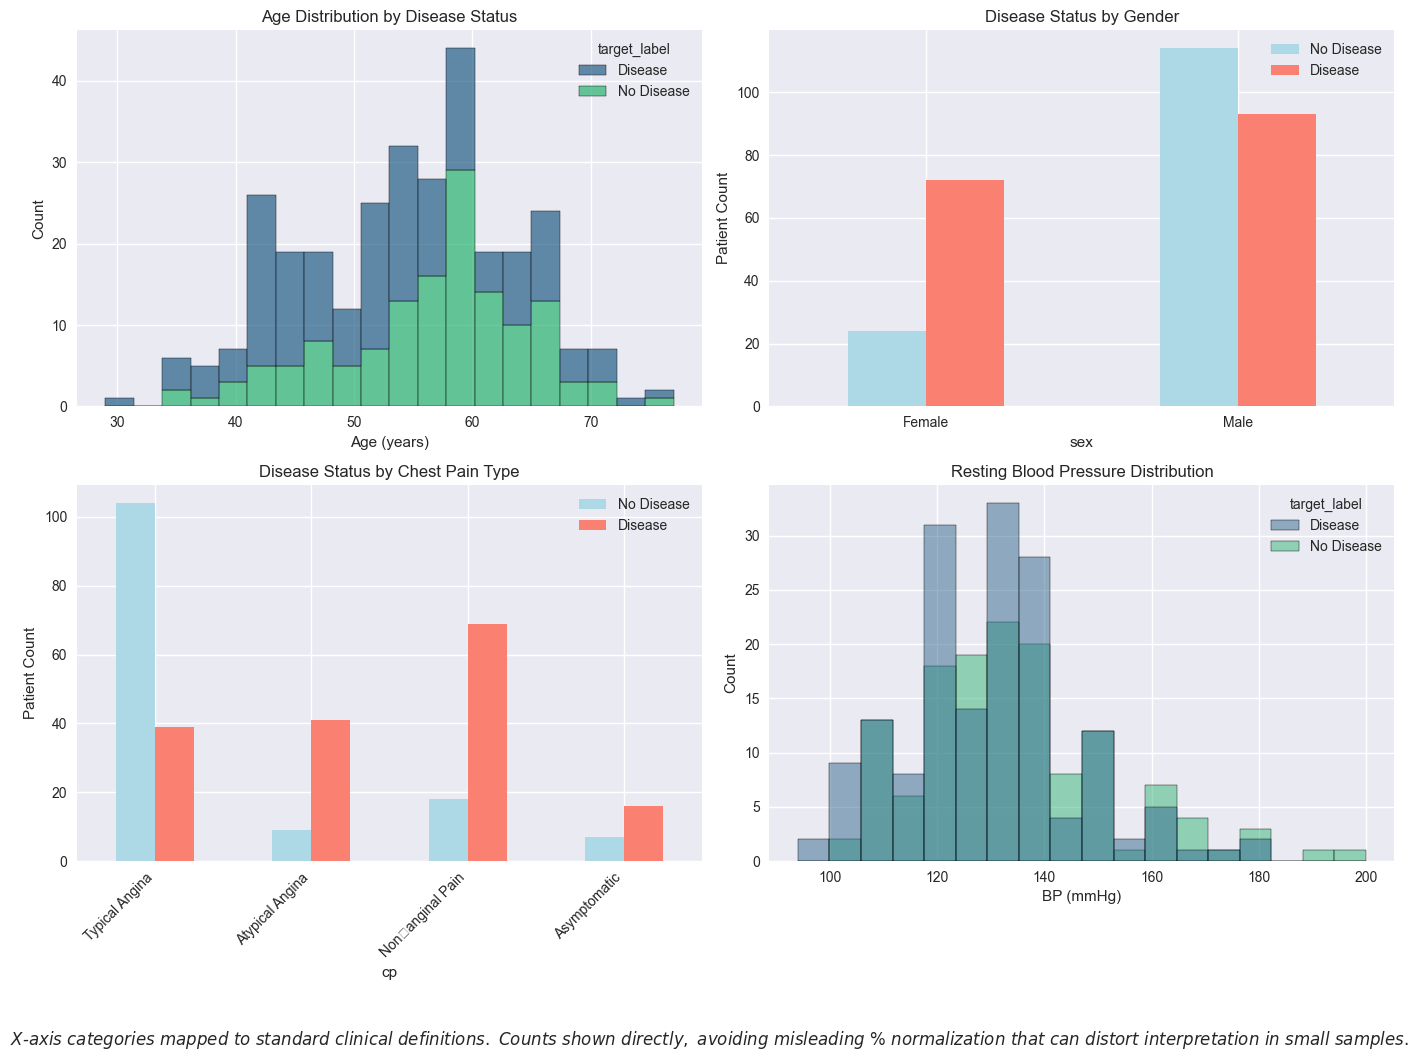

In [14]:
# Use 'target_label' for the hue to get a proper legend.
df['target_label'] = df['target'].map({0: 'No Disease', 1: 'Disease'})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
sns.histplot(
    data=df, x='age', hue='target_label', multiple='stack', 
    bins=20, palette='viridis', ax=axes[0,0]
)
axes[0,0].set_title('Age Distribution by Disease Status')
axes[0,0].set_xlabel('Age (years)')


# Gender distribution
gender_crosstab = pd.crosstab(df['sex'], df['target'])
gender_crosstab.plot(kind='bar', ax=axes[0,1], color=['lightblue', 'salmon'], stacked=False)
axes[0,1].set_title('Disease Status by Gender')
axes[0,1].set_ylabel('Patient Count')
axes[0,1].set_xticklabels([clinical_mappings['sex'][i] for i in gender_crosstab.index], rotation=0)
axes[0,1].legend(gender_crosstab.columns.map({0: 'No Disease', 1: 'Disease'}))

# Chest pain type
cp_crosstab = pd.crosstab(df['cp'], df['target'])
cp_crosstab.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'salmon'], stacked=False)
axes[1,0].set_title('Disease Status by Chest Pain Type')
axes[1,0].set_ylabel('Patient Count')
axes[1,0].set_xticklabels([clinical_mappings['cp'][i] for i in cp_crosstab.index], rotation=45, ha='right')
axes[1,0].legend(cp_crosstab.columns.map({0: 'No Disease', 1: 'Disease'}))

# Resting BP
sns.histplot(data=df, x='trestbps', hue='target_label', multiple='layer', palette='viridis', ax=axes[1,1])
axes[1,1].set_title('Resting Blood Pressure Distribution')
axes[1,1].set_xlabel('BP (mmHg)')

plt.tight_layout()
fig.text(0.5, -0.05, 
         r"$\bf{\it{X\text{-}axis\ categories\ mapped\ to\ standard\ clinical\ definitions.\ Counts\ shown\ directly,\ avoiding\ misleading\ \%\ normalization\ that\ can\ distort\ interpretation\ in\ small\ samples.}}$",
         ha='center', fontsize=12)
plt.show()

#### 📊 Summary Statistics

In [15]:
print("\n" + "="*60)
print("📊 Age Summary by Disease Status")
print(df.groupby('target')['age'].describe())

print("\n" + "="*60)
print("📊 Gender Proportion")
print(df['sex'].value_counts(normalize=True).rename({0:'Female', 1:'Male'}))
print(df.groupby('target')['sex'].value_counts(normalize=True))

print("\n" + "="*60)
print("📊 Chest Pain Type Counts by Disease Status")
print(pd.crosstab(df['cp'], df['target']))

print("\n" + "="*60)
print("📊 Resting Blood Pressure Summary by Disease Status")
print(df.groupby('target')['trestbps'].describe())


📊 Age Summary by Disease Status
        count       mean       std   min   25%   50%   75%   max
target                                                          
0       138.0  56.601449  7.962082  35.0  52.0  58.0  62.0  77.0
1       165.0  52.496970  9.550651  29.0  44.0  52.0  59.0  76.0

📊 Gender Proportion
sex
Male      0.683168
Female    0.316832
Name: proportion, dtype: float64
target  sex
0       1      0.826087
        0      0.173913
1       1      0.563636
        0      0.436364
Name: proportion, dtype: float64

📊 Chest Pain Type Counts by Disease Status
target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

📊 Resting Blood Pressure Summary by Disease Status
        count        mean        std    min    25%    50%     75%    max
target                                                                  
0       138.0  134.398551  18.729944  100.0  120.0  130.0  144.75  200.0
1       165.0  129.303030  16.169613   94.0  120.0  130.0  

### 📊 Cholesterol, Max HR, Exercise Angina & ST Depression by Heart Disease Status

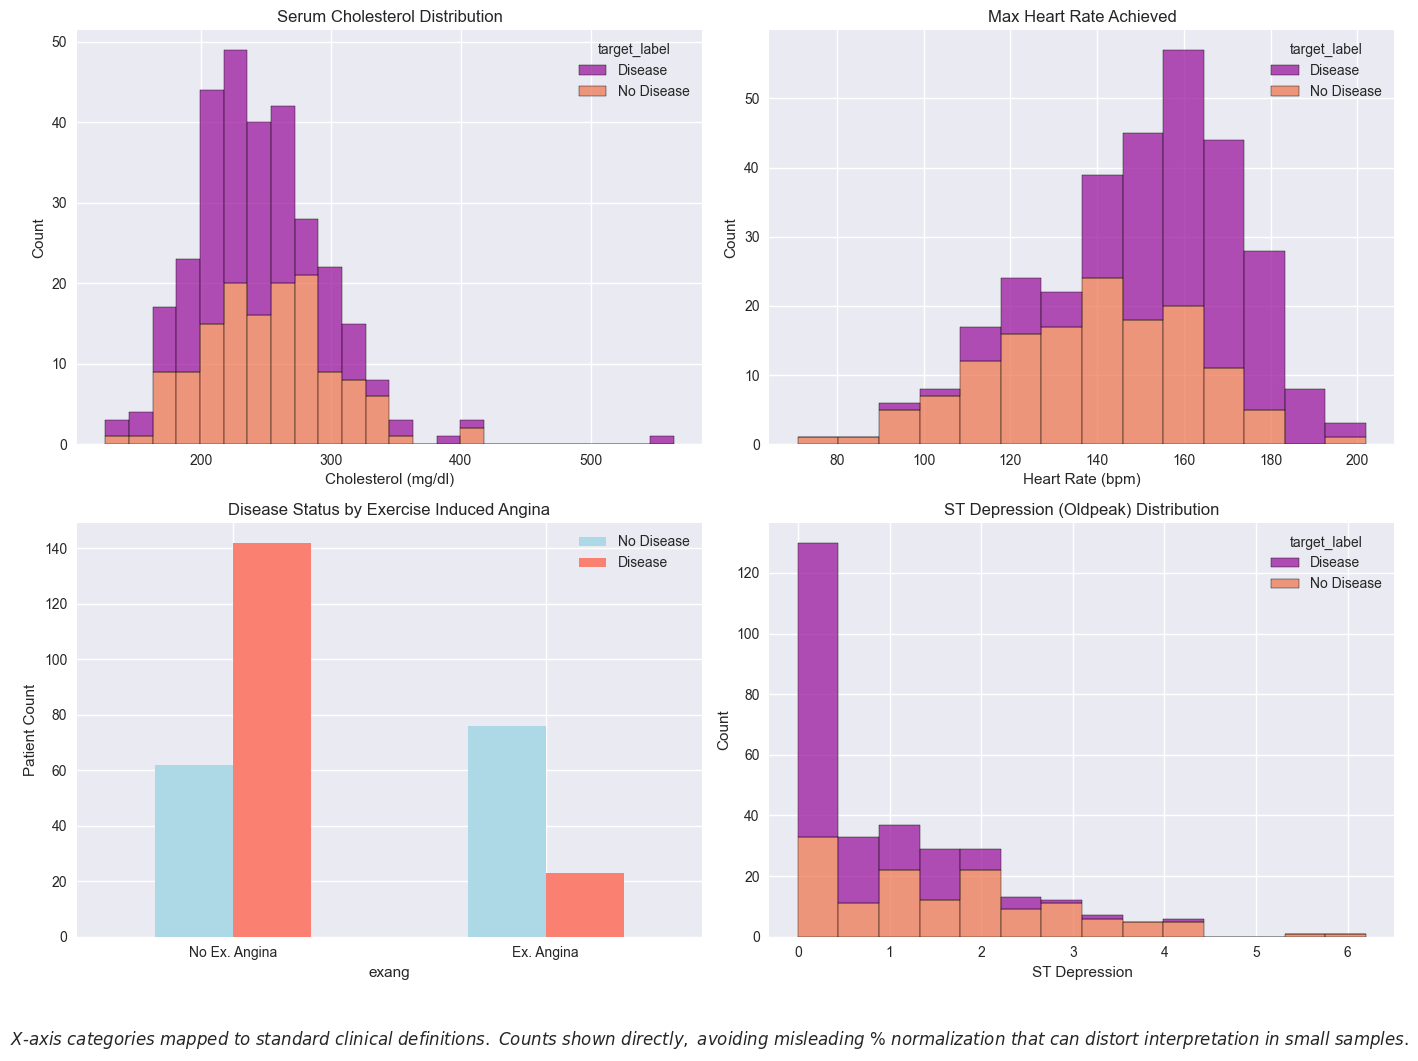

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Serum Cholesterol
sns.histplot(
    data=df, x='chol', hue='target_label', multiple='stack', 
    palette='plasma', ax=axes[0,0]
)
axes[0,0].set_title('Serum Cholesterol Distribution')
axes[0,0].set_xlabel('Cholesterol (mg/dl)')

# Max Heart Rate
sns.histplot(
    data=df, x='thalach', hue='target_label', multiple='stack', 
    palette='plasma', ax=axes[0,1]
)
axes[0,1].set_title('Max Heart Rate Achieved')
axes[0,1].set_xlabel('Heart Rate (bpm)')

# Exercise Angina
exang_crosstab = pd.crosstab(df['exang'], df['target'])
exang_crosstab.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'salmon'], stacked=False)
axes[1,0].set_title('Disease Status by Exercise Induced Angina')
axes[1,0].set_ylabel('Patient Count')
axes[1,0].set_xticklabels([clinical_mappings['exang'][i] for i in exang_crosstab.index], rotation=0)
axes[1,0].legend(exang_crosstab.columns.map({0: 'No Disease', 1: 'Disease'}))

# ST Depression
sns.histplot(
    data=df, x='oldpeak', hue='target_label', multiple='stack', 
    palette='plasma', ax=axes[1,1]
)
axes[1,1].set_title('ST Depression (Oldpeak) Distribution')
axes[1,1].set_xlabel('ST Depression')

plt.tight_layout()
fig.text(0.5, -0.05, 
         r"$\bf{\it{X\text{-}axis\ categories\ mapped\ to\ standard\ clinical\ definitions.\ Counts\ shown\ directly,\ avoiding\ misleading\ \%\ normalization\ that\ can\ distort\ interpretation\ in\ small\ samples.}}$",
         ha='center', fontsize=12)
plt.show()

#### 📊 Summary Statistics

In [17]:
print("\n" + "="*60)
print("📊 Cholesterol Summary by Disease Status")
print(df.groupby('target')['chol'].describe())

print("\n" + "="*60)
print("📊 Max Heart Rate Summary by Disease Status")
print(df.groupby('target')['thalach'].describe())

print("\n" + "="*60)
print("📊 Exercise Induced Angina Proportion by Disease Status")
print(df['exang'].value_counts(normalize=True).rename({0:'No Ex. Angina', 1:'Ex. Angina'}))
print(df.groupby('target')['exang'].value_counts(normalize=True))

print("\n" + "="*60)
print("📊 ST Depression Summary by Disease Status")
print(df.groupby('target')['oldpeak'].describe())


📊 Cholesterol Summary by Disease Status
        count        mean        std    min     25%    50%    75%    max
target                                                                  
0       138.0  251.086957  49.454614  131.0  217.25  249.0  283.0  409.0
1       165.0  242.230303  53.552872  126.0  208.00  234.0  267.0  564.0

📊 Max Heart Rate Summary by Disease Status
        count        mean        std   min    25%    50%    75%    max
target                                                                
0       138.0  139.101449  22.598782  71.0  125.0  142.0  156.0  195.0
1       165.0  158.466667  19.174276  96.0  149.0  161.0  172.0  202.0

📊 Exercise Induced Angina Proportion by Disease Status
exang
No Ex. Angina    0.673267
Ex. Angina       0.326733
Name: proportion, dtype: float64
target  exang
0       1        0.550725
        0        0.449275
1       0        0.860606
        1        0.139394
Name: proportion, dtype: float64

📊 ST Depression Summary by Disease Statu

### 📊 ST Slope, Major Vessels (CA) & Thalassemia by Heart Disease Status

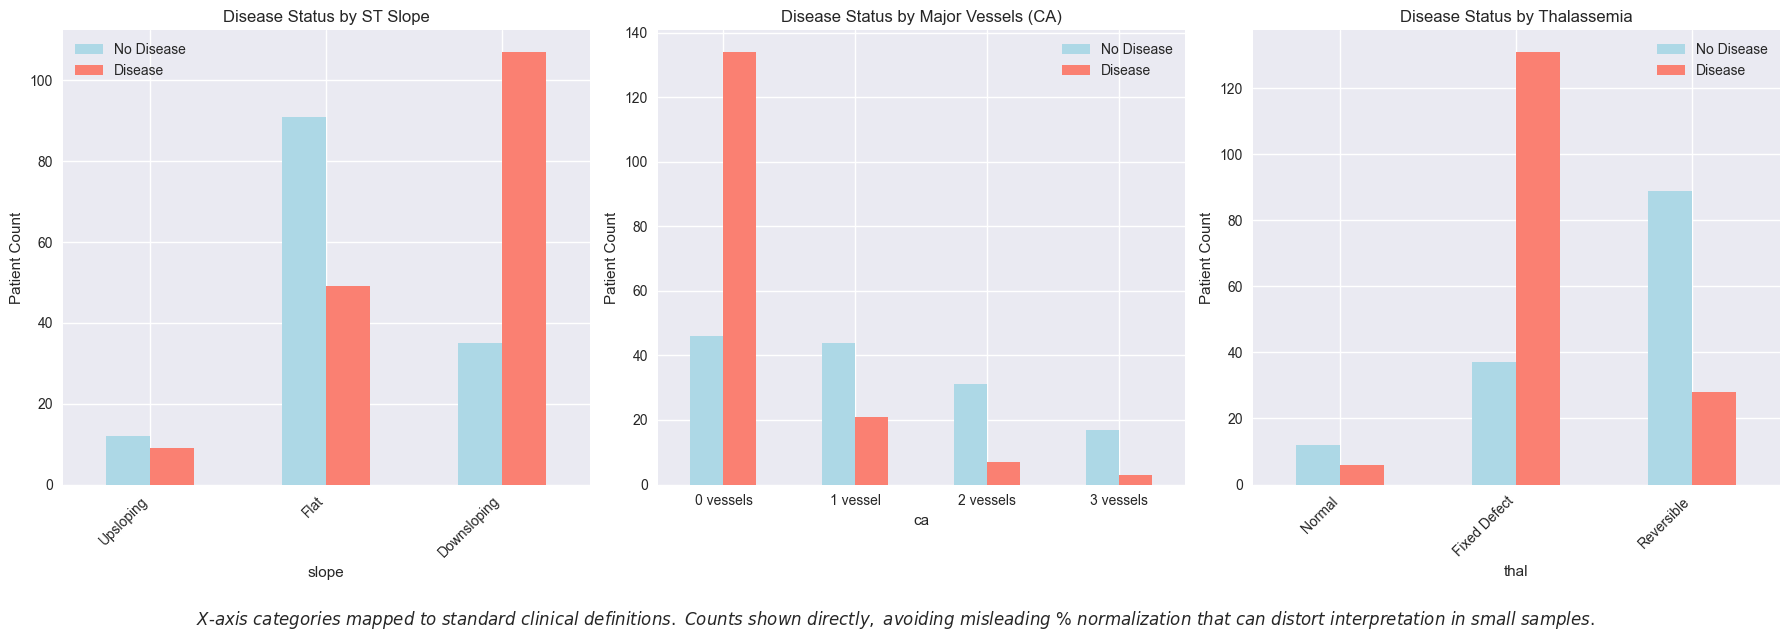

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ST Slope
slope_crosstab = pd.crosstab(df['slope'], df['target'])
slope_crosstab.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'], stacked=False)
axes[0].set_title('Disease Status by ST Slope')
axes[0].set_ylabel('Patient Count')
axes[0].set_xticklabels([clinical_mappings['slope'][i] for i in slope_crosstab.index], rotation=45, ha='right')
axes[0].legend(slope_crosstab.columns.map({0: 'No Disease', 1: 'Disease'}))

# Major Vessels (CA)
ca_crosstab = pd.crosstab(df['ca'], df['target'])
ca_crosstab.plot(kind='bar', ax=axes[1], color=['lightblue', 'salmon'], stacked=False)
axes[1].set_title('Disease Status by Major Vessels (CA)')
axes[1].set_ylabel('Patient Count')
axes[1].set_xticklabels([clinical_mappings['ca'][i] for i in ca_crosstab.index], rotation=0)
axes[1].legend(ca_crosstab.columns.map({0: 'No Disease', 1: 'Disease'}))

# Thalassemia
thal_crosstab = pd.crosstab(df['thal'], df['target'])
thal_crosstab.plot(kind='bar', ax=axes[2], color=['lightblue', 'salmon'], stacked=False)
axes[2].set_title('Disease Status by Thalassemia')
axes[2].set_ylabel('Patient Count')
axes[2].set_xticklabels([clinical_mappings['thal'][i] for i in thal_crosstab.index], rotation=45, ha='right')
axes[2].legend(thal_crosstab.columns.map({0: 'No Disease', 1: 'Disease'}))

plt.tight_layout()
fig.text(0.5, -0.05, 
         r"$\bf{\it{X\text{-}axis\ categories\ mapped\ to\ standard\ clinical\ definitions.\ Counts\ shown\ directly,\ avoiding\ misleading\ \%\ normalization\ that\ can\ distort\ interpretation\ in\ small\ samples.}}$",
         ha='center', fontsize=12)
plt.show()

#### 📊 Summary Statistics

In [19]:
print("\n" + "="*60)
print("📊 ST Slope Counts by Disease Status")
print(pd.crosstab(df['slope'], df['target']))

print("\n" + "="*60)
print("📊 Major Vessels (CA) Counts by Disease Status")
print(pd.crosstab(df['ca'], df['target']))

print("\n" + "="*60)
print("📊 Thalassemia Counts by Disease Status")
print(pd.crosstab(df['thal'], df['target']))


📊 ST Slope Counts by Disease Status
target   0    1
slope          
0       12    9
1       91   49
2       35  107

📊 Major Vessels (CA) Counts by Disease Status
target   0    1
ca             
0       46  134
1       44   21
2       31    7
3       17    3

📊 Thalassemia Counts by Disease Status
target   0    1
thal           
1       12    6
2       37  131
3       89   28


### 📊 Correlation Heatmap of All Features

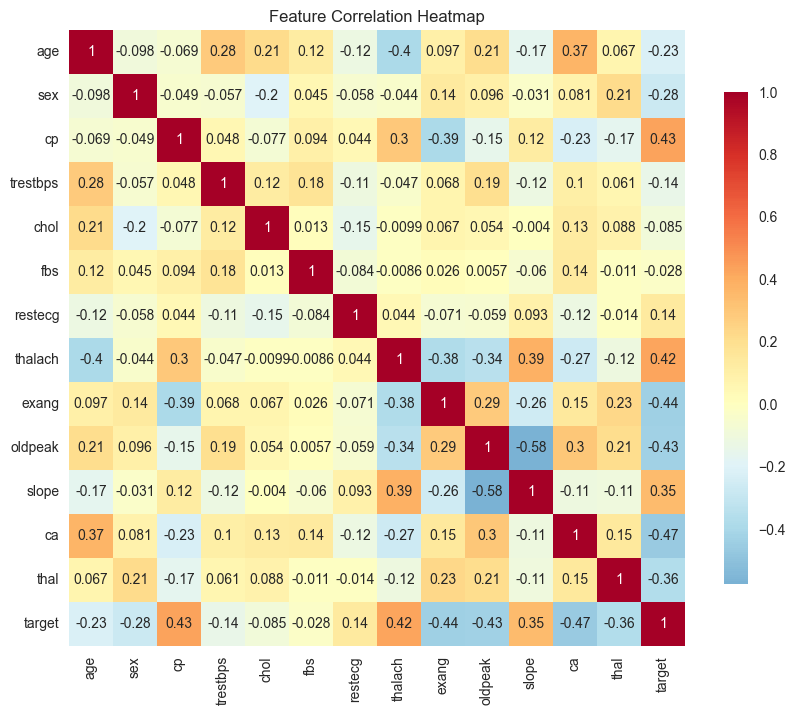

In [20]:
plt.figure(figsize=(10,8))
correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(
    correlation_matrix, annot=True, cmap='RdYlBu_r', 
    center=0, square=True, cbar_kws={'shrink': 0.8}
)
plt.title('Feature Correlation Heatmap')
plt.show()

### 📈 Feature Correlation with Heart Disease Target

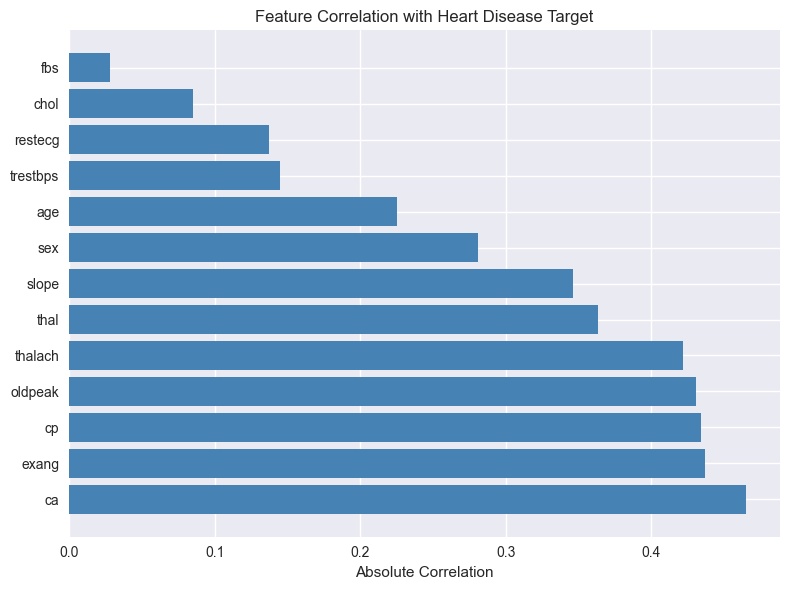

In [21]:
feature_target_corr = df.select_dtypes(include='number').corr()['target'].abs().sort_values(ascending=False)[1:]

plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_target_corr)), feature_target_corr.values, color='steelblue')
plt.yticks(range(len(feature_target_corr)), feature_target_corr.index)
plt.xlabel('Absolute Correlation')
plt.title('Feature Correlation with Heart Disease Target')
plt.tight_layout()
plt.show()

### 📊 Scatter Plots: Age vs Max HR & Cholesterol vs ST Depression

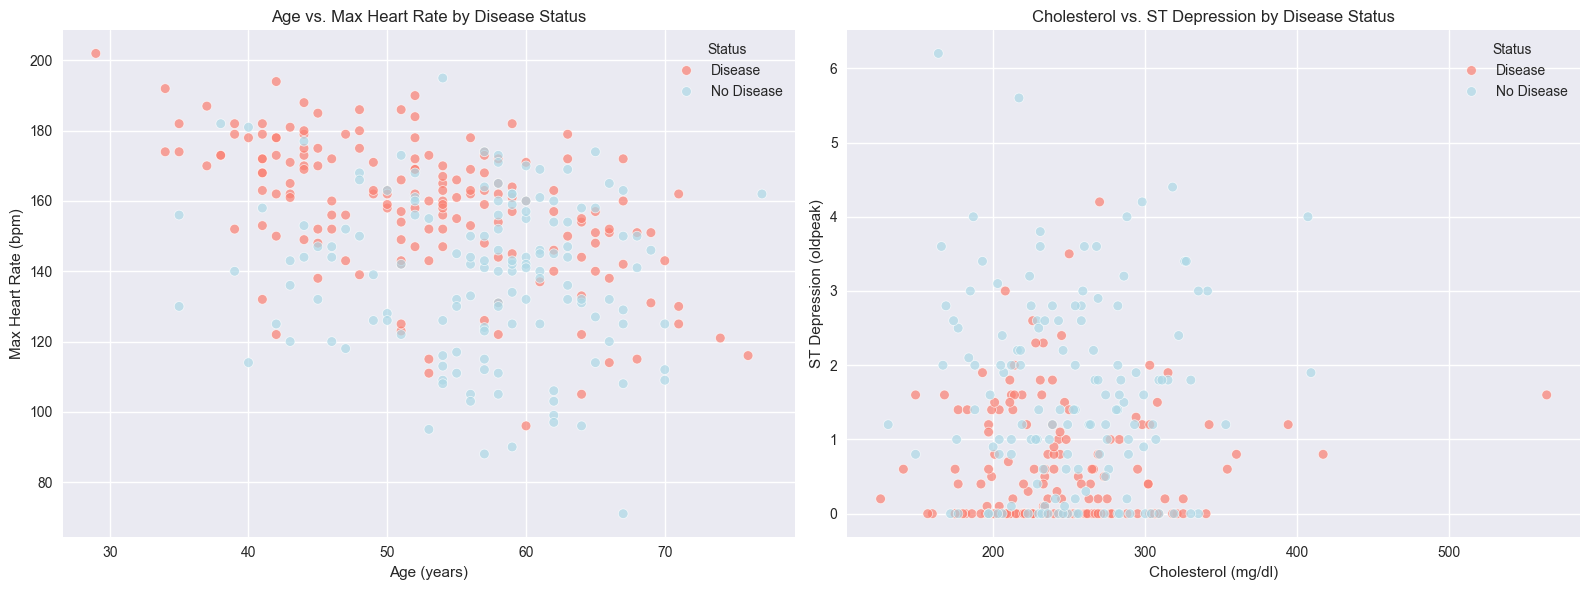

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define a professional color palette
palette = {'No Disease': 'lightblue', 'Disease': 'salmon'}

# Age vs Max Heart Rate
sns.scatterplot(
    data=df, x='age', y='thalach', hue='target_label',
    palette=palette, alpha=0.7, ax=axes[0]
)
axes[0].set_title('Age vs. Max Heart Rate by Disease Status')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Max Heart Rate (bpm)')
axes[0].legend(title='Status')

# Cholesterol vs ST Depression
sns.scatterplot(
    data=df, x='chol', y='oldpeak', hue='target_label',
    palette=palette, alpha=0.7, ax=axes[1]
)
axes[1].set_title('Cholesterol vs. ST Depression by Disease Status')
axes[1].set_xlabel('Cholesterol (mg/dl)')
axes[1].set_ylabel('ST Depression (oldpeak)')
axes[1].legend(title='Status')

plt.tight_layout()
plt.show()

#### 📊 Summary Statistics

In [23]:
# Correlation heatmaps & target correlation

print("\n" + "="*60)
print("📊 Correlation Matrix")
print(df.select_dtypes(include='number').corr())

print("\n" + "="*60)
print("📈 Feature Correlation with Target")
print(df.select_dtypes(include='number').corr()['target'].sort_values(ascending=False))


# Scatter plots (Age vs Max HR, Chol vs ST Depression)

print("\n" + "="*60)
print("📊 Age vs Max HR correlation")
print(df[['age', 'thalach']].corr())

print("\n" + "="*60)
print("📊 Cholesterol vs ST Depression correlation")
print(df[['chol', 'oldpeak']].corr())


📊 Correlation Matrix
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.369270  0.081241 -0.227886  0.100552  0.129494  0.140764   
thal      0.066745  0.211652 -0.169125  0.

## 🩺 **Clinical Insights (High-Impact Synthesis)**

This cohort tells a story that is part textbook cardiology, part paradox — a vivid reminder of why machine learning is indispensable in clinical data science.

---

#### ✅ Pillar 1: Robust, Clinically Consistent Predictors
Certain features align beautifully with cardiovascular pathophysiology:

- **Resting ECG (restecg):** Abnormal ST-T changes or LV hypertrophy (restecg=1 or 2) are strongly associated with disease.
- **ST Slope:** Downsloping ST segments (slope=2), a hallmark of ischemia, are clearly tied to confirmed disease.
- **Thalassemia Scans (thal=2):** Fixed defects, indicating old infarcted myocardium, are heavily clustered among those with disease.

#### ⚠ Pillar 2: The "Paradoxical Signature" — This Dataset’s Unique Personality
Alongside these clear signals lies a set of counter-intuitive patterns that define this cohort’s diagnostic fingerprint. They’re not noise; they’re exactly why predictive models are essential.

- **The Chest Pain Anomaly:** Patients presenting with **“Typical Angina” (cp=0)** — the textbook symptom of CAD — were more often found in the no disease group. Meanwhile, atypical or non-anginal pain had higher disease prevalence. This suggests strong **referral and diagnostic biases**, where classic cases were quickly ruled out via invasive studies.
  
- **The Exercise Response Paradox:** Patients with heart disease paradoxically showed a **healthier exercise profile**: higher max heart rates, less exercise-induced angina, and lower ST depression. Clinically, we’d expect the opposite. This is likely tied to local referral pathways or how exercise testing was interpreted in this cohort.

- **The Reversible Defect Riddle (thal=3):** Perhaps the most profound paradox: the hallmark of active ischemia on stress imaging (reversible defect) overwhelmingly appears in patients **without confirmed CAD**, underscoring the idiosyncratic nature of this dataset.

- **Weakness of Traditional Risk Factors:** Classic risk factors like cholesterol, resting BP, fasting blood sugar, and even age showed **minimal separation** between groups. This highlights a core truth in predictive medicine: the value of a feature is always **context-dependent**.

#### 🚀 Why Machine Learning is Critical Here
This data is a perfect showcase of how machine learning can **transcend rigid clinical heuristics**. It integrates:

- **Robust, pathophysiologic signals** (ST slope and fixed defects)  
- with a **counter-intuitive exercise, major vessels and chest pain signature**,  
- all while adjusting for weak traditional markers that might mislead a purely rule-based system.

---

✅ **Bottom Line:**  
This dataset is a microcosm of real-world cardiovascular diagnostics: it blends classic markers with striking paradoxes that would confound simple scoring systems. Machine learning thrives in precisely this environment, uncovering nuanced, data-specific risk signatures that extend far beyond textbook patterns — and ultimately offering clinicians deeper, more personalized decision support.

## ==================================================================
## 3️⃣ FEATURE ENGINEERING & ENCODING
## ==================================================================

### 🛠 Create Copy for Feature Engineering

In [24]:
df_processed = df.copy()

### 📊 Create Clinical Age Groups

In [25]:
def create_age_groups(age):
    if age < 40:
        return 0
    elif age < 55:
        return 1
    elif age < 65:
        return 2
    else:
        return 3

df_processed['age_group'] = df_processed['age'].apply(create_age_groups)

### 🫀 Create Chest Pain Severity Score

In [26]:
def chest_pain_severity(cp):
    severity_map = {0: 4, 1: 3, 2: 2, 3: 1}
    return severity_map[cp]

df_processed['cp_severity'] = df_processed['cp'].apply(chest_pain_severity)

### 🩸 Categorize BP & Cholesterol Risk

In [27]:
def bp_category(bp):
    if bp < 120:
        return 0
    elif bp < 130:
        return 1
    elif bp < 140:
        return 2
    else:
        return 3

def chol_risk(chol):
    if chol < 200:
        return 0
    elif chol < 240:
        return 1
    else:
        return 2

df_processed['bp_category'] = df_processed['trestbps'].apply(bp_category)
df_processed['chol_risk'] = df_processed['chol'].apply(chol_risk)

### ⚙ Create HR Achievement & Interaction Features

In [28]:
df_processed['hr_achievement'] = df_processed['thalach'] / (220 - df_processed['age'])
df_processed['age_chol_interaction'] = df_processed['age'] * df_processed['chol'] / 1000
df_processed['cp_exang_interaction'] = df_processed['cp'] * df_processed['exang']

### ✅ Summary of New Clinical Features

In [29]:
print("✅ New Clinical Features Created:")
print("• age_group, cp_severity, bp_category, chol_risk, hr_achievement, age_chol_interaction, cp_exang_interaction")

✅ New Clinical Features Created:
• age_group, cp_severity, bp_category, chol_risk, hr_achievement, age_chol_interaction, cp_exang_interaction


In [30]:
df_processed.to_csv('../data/heartdisease_processed.csv', index=False)
print("✅ Processed dataset saved to '../data/heartdisease_cleaned.csv'.")

✅ Processed dataset saved to '../data/heartdisease_cleaned.csv'.


## 🩺 **Clinical Insights (High-Impact Synthesis)**

This feature engineering phase didn’t just transform data — it encoded decades of cardiovascular expertise into a structure that thinks like a cardiologist. It’s a prime example of why machine learning is indispensable in modern clinical data science.

---

#### ✅ Pillar 1: Robust, Guideline-Driven Risk Encodings
Certain engineered features align perfectly with cardiovascular pathophysiology and established clinical practice:

- **Age, BP & Cholesterol Stratification:**  
  The continuous metrics was converted into clinically validated categories that mirror ACC/AHA hypertension stages and NCEP cholesterol risk zones. Now, a reading of “135 mmHg” isn’t just a number — it becomes **“Stage 1 Hypertension,”** immediately meaningful for CAD risk.

- **Chest Pain Severity Score:**  
  The scaled chest pain types was reversed into a true **risk-aligned severity index**, so typical angina gets the highest weight, just as in pre-test probability models used by cardiologists.

- **Heart Rate Achievement:**  
  By calculating how close patients come to their age-predicted max HR, I directly embedded **exercise physiology principles**, letting the model interpret cardiovascular reserve — a hallmark of stress testing.


#### ⚠ Pillar 2: Compound Risks & Multi-Factorial Signatures
I introduced **clinically chosen interaction terms** that capture how risk factors amplify each other in real patients:

- **Age × Cholesterol:**  
  Recognizes that high cholesterol in a 35-year-old is fundamentally different than in a 70-year-old.

- **Chest Pain × Exercise Angina:**  
  Models how typical angina coupled with exercise-induced symptoms dramatically elevates concern for obstructive CAD.

These features move beyond siloed risk factors, building a dataset that mirrors how cardiologists synthesize multiple data points at once.


#### 🚀 Why Machine Learning is Critical Here
This engineering step didn’t just prepare data for algorithms — it shaped a **digital patient profile steeped in cardiology logic**. It integrates:

- **Classic pathophysiologic markers** (age, BP, cholesterol categories)
- **Dynamic functional measures** (HR achievement, CP × EX interactions)
- all crafted under clinical guidelines that would otherwise be missed by a generic pipeline.

This is exactly why machine learning excels here — it learns both **the explicit rules of cardiovascular medicine** and the hidden, data-specific nuances that even seasoned clinicians might overlook.

---

✅ **Bottom Line:**  
This isn’t routine preprocessing; it’s a deliberate fusion of clinical reasoning and data engineering that builds a feature space perfectly primed for predictive cardiology.  
It’s the type of work that elevates models from mere statistical classifiers to **decision-support tools that reason like physicians — but at machine scale**.